## Questions need to be answered by this investigation:

### 1. What are the movies with highest budget?

### 2. What are the movies with highest revenue?

### 3. Is there a correlation between movies budget and revenue?

### 4. Who are the directors with movies of highest revenue?

### 5. Who are the directors with largest number of movies?

### 6. Who are the directors with highest total revenue?

### 7. What are the movies with highest vote_average?

### 8. Who are the directors with movies of highest vote_average?

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [154]:
movie_df= pd.read_csv('tmdb-movies.csv')
movie_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [155]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [156]:
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [157]:
movie_df.drop(['id','homepage','tagline','keywords','production_companies'],axis=1,inplace=True)

In [158]:
movie_df.isnull().sum()

imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [159]:
#movie_df['imdb_id'].dropna(how='all',axis=0,inplace=True)
movie_df.dropna(subset=['imdb_id'],axis=0,inplace=True)

In [160]:
movie_df.isnull().sum()

imdb_id            0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          40
overview           3
runtime            0
genres            21
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [161]:
movie_df['director'].value_counts().to_frame()

,director
Woody Allen,45
Clint Eastwood,34
Martin Scorsese,29
Steven Spielberg,29
Ridley Scott,23
...,...
Richard Elfman,1
Alan Polsky|Gabe Polsky,1
Fede Alvarez,1
Ben Ramsey,1


In [162]:
movie_df['director'].mode()

0    Woody Allen
dtype: object

In [163]:
movie_df.dropna(subset=['director'],axis=0,inplace=True)

## Note: I have 40 null rows if I fill them by mode I will have many outliers.So I chose to drop 40 rows from 10856 
10866 ---> 10816 
Then I dropped the data by 0.46% from the original

movie_df.isnull().sum()

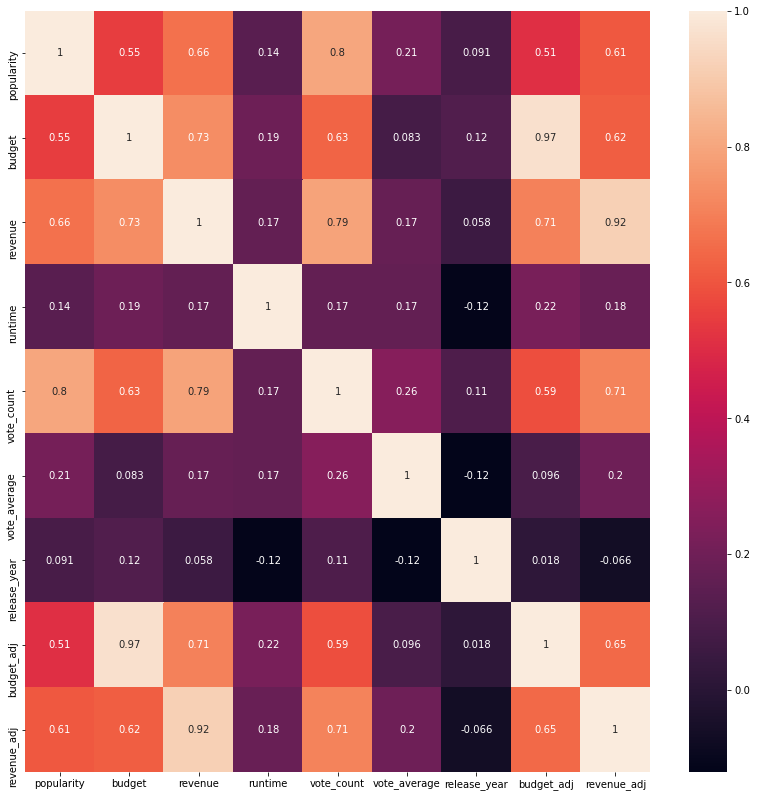

In [164]:
plt.figure(figsize=(14,14))
sb.heatmap(movie_df.corr(), annot=True)
plt.show()

In [165]:
movie_df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'overview', 'runtime', 'genres', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [166]:
movie_df['cast'].mode()

0    Louis C.K.
dtype: object

In [167]:
movie_df['cast'].value_counts().to_frame()

,cast
Louis C.K.,6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei,5
Zac Efron|Vanessa Hudgens|Ashley Tisdale|Lucas Grabeel|Corbin Bleu,3
Pierre Coffin,3
George Carlin,3
...,...
Sam Rockwell|Rosemarie DeWitt|Saxon Sharbino|Kyle Catlett|Kennedi Clements,1
Diane Lane|John Cusack|Elizabeth Perkins|Christopher Plummer|Dermot Mulroney,1
Steven Seagal|Jacqueline Lord|Roger Guenveur Smith|Luke Goss,1
Emily Blunt|Ewan McGregor|Kristin Scott Thomas|Rachael Stirling|Amr Waked,1


In [168]:
movie_df['genres'].mode()

0    Drama
dtype: object

In [169]:
movie_df['genres'].value_counts().to_frame()

,genres
Drama,711
Comedy,707
Documentary,306
Drama|Romance,289
Comedy|Drama,280
...,...
Action|Adventure|Crime|Drama|Family,1
Science Fiction|Action|Animation|Adventure,1
Drama|Family|Fantasy|TV Movie,1
Romance|Science Fiction|Horror|Action|Crime,1


In [170]:
movie_df[movie_df['cast'].isnull() & movie_df['genres'].isnull()]

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
620,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,A woman finds a VHS tape on her doorstep that ...,90,NaN,10/6/15,13,5.0,2015,0.0,0.0


In [171]:
anaylsis1=movie_df[movie_df['cast'].isnull()]
anaylsis1

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,Sanjay's Super Team follows the daydream of a ...,7,Animation,11/25/15,47,6.9,2015,0.000000,0.0
441,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,A documentary on the unrest in Ukraine during ...,98,Documentary,10/9/15,37,8.2,2015,0.000000,0.0
465,tt4393514,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,An experimental documentary that explores Saud...,135,Documentary,1/24/15,19,7.8,2015,0.000000,0.0
536,tt3762974,0.122543,0,0,A Faster Horse,NaN,David Gelb,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,10/8/15,12,8.0,2015,0.000000,0.0
538,tt3983674,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,"Compared to girls, research shows that boys in...",88,Documentary,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,tt0093832,0.253376,0,0,Red's Dream,NaN,John Lasseter,Life as the sole sale item in the clearance co...,4,Animation,8/17/87,44,6.6,1987,0.000000,0.0
9755,tt0061402,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,This short film is a metaphor for the Vietnam ...,6,Drama,1/1/68,12,6.7,1968,0.000000,0.0
10434,tt0060984,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,Lynch's first film project consists of a loop ...,4,Animation,1/1/67,16,5.2,1967,1307.352748,0.0
10550,tt0091455,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,A baby lamp finds a ball to play with and it's...,2,Animation|Family,8/17/86,81,7.3,1986,0.000000,0.0


In [172]:
anaylsis1['genres'].value_counts().to_frame()

,genres
Documentary,32
Animation,7
Animation|Family,5
Animation|Comedy,3
Drama|Animation,2
Animation|Family|Fantasy,1
Foreign|Documentary,1
Drama|Comedy|Family,1
Animation|Comedy|Science Fiction,1
Animation|Fantasy,1


### They have different budget , revenue, popularity which can affect my analysis, 

In [173]:
anaylsis1['popularity'].value_counts().to_frame()

,popularity
0.047256,1
0.193929,1
0.067761,1
0.002460,1
0.226028,1
...,...
0.058472,1
0.168545,1
0.065543,1
0.220751,1


In [174]:
anaylsis2=movie_df[movie_df['genres'].isnull()]
anaylsis2

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,A woman finds a VHS tape on her doorstep that ...,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
1712,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,"True story of Mary Griffith, gay rights crusad...",88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,NaN,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2853,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,The story takes place in a small town (called ...,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,The London 2012 Olympic Games Opening Ceremony...,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0
4732,tt2084977,0.235911,0,0,The Scapegoat,Andrew Scott|Jodhi May|Eileen Atkins|Matthew R...,Charles Sturridge,"Set in 1952, as England prepares for the coron...",100,NaN,9/9/12,12,6.2,2012,0.00000,0.0
4890,tt2219564,0.083202,0,0,Cousin Ben Troop Screening,Jason Schwartzman,Wes Anderson,Cousin Ben hosts a screening of Wes Anderson's...,2,NaN,1/1/12,14,7.0,2012,0.00000,0.0


In [175]:
anaylsis2['cast'].value_counts()

Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan                                                1
Matt Smith|Jenna Coleman                                                                1
Carlo Verdone|Claudia Gerini|Veronica Pivetti|Manuela Arcuri|Cinzia Mascoli             1
Arnold Schwarzenegger|Linda Hamilton|Edward Furlong|Robert Patrick                      1
Matt O'Leary|Laura Vandervoort|Myles Jeffrey|Caroline Rhea|Charles Shaughnessy          1
Charles Dance|Phyllis Logan|Patrick Ryecart|Lady Marcia Fitzalan-Howard|Ed Devereaux    1
Sylvester Stallone|Henrietta Holm|Nicholas Warren|Frank Micelli|Jodi Van Prang          1
Aamir Khan|Rani Mukerji|Randeep Hooda|Saqib Saleem|Saqib Saleem                         1
Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Taylor|John Cahill Lawless                  1
Andrew Scott|Jodhi May|Eileen Atkins|Matthew Rhys|Sheridan Smith                        1
Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan Butler|Austin Nichols                     1
Diego Abat

### Name of movies

In [176]:
movie_df['original_title'].value_counts().to_frame()

,original_title
Hamlet,4
Beauty and the Beast,3
The Three Musketeers,3
Life,3
Julia,3
...,...
Like Father Like Son,1
Eddie Izzard: Dress to Kill,1
The Big Easy,1
Katy Perry: Part of Me,1


In [177]:
movie_df[movie_df['original_title']=='Julia']

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1156,tt2582426,0.240776,0,2710,Julia,Ashley C. Williams|Tahyna Tozzi|Jack Noseworth...,Matthew A. Brown,"After suffering a brutal trauma, Julia uses an...",95,Thriller|Horror,10/14/14,17,4.8,2014,0.000000e+00,2.496157e+03
1349,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,Fred Zinnemann,JULIA covers the 1930s when Lillian attained f...,117,Drama,10/2/77,10,5.0,1977,0.000000e+00,0.000000e+00
3272,tt0903627,0.281186,6000000,1300000,Julia,Tilda Swinton|Kate del Castillo|Aidan Gould|Br...,Erick Zonca,An alcoholic (Tilda Swinton) becomes involved ...,138,Drama,2/9/08,10,7.1,2008,6.076720e+06,1.316623e+06


## drop col of 70 cast , 20 genres

In [178]:
movie_df.drop(['cast','genres'],axis=1,inplace=True)

In [184]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10816 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         10816 non-null  object 
 1   popularity      10816 non-null  float64
 2   budget          10816 non-null  int64  
 3   revenue         10816 non-null  int64  
 4   original_title  10816 non-null  object 
 5   director        10816 non-null  object 
 6   overview        10813 non-null  object 
 7   runtime         10816 non-null  int64  
 8   release_date    10816 non-null  object 
 9   vote_count      10816 non-null  int64  
 10  vote_average    10816 non-null  float64
 11  release_year    10816 non-null  int64  
 12  budget_adj      10816 non-null  float64
 13  revenue_adj     10816 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [185]:
movie_df=movie_df.astype({'overview':'str'})

In [181]:
movie_df['overview'].mode()

0    No overview found.
dtype: object

In [186]:
#movie_df['cast'].fillna(movie_df['cast'].mode(), inplace=True)
movie_df['overview'].fillna(movie_df['overview'].mode(), inplace=True)
#movie_df['genres'].fillna(movie_df['genres'].mode(), inplace=True)

In [187]:
movie_df.isnull().sum()

imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
director          0
overview          0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

## Questions need to be answered by this investigation:

1. What are the movies with highest budget?

2. What are the movies with highest revenue?

3. Is there a correlation between movies budget and revenue?

4. Who are the directors with movies of highest revenue?

5. Who are the directors with largest number of movies?

6. Who are the directors with highest total revenue?

7. What are the movies with highest vote_average?

8. Who are the directors with movies of highest vote_average?

##  What are the movies with highest budget?

In [199]:
movie_df['original_title'][movie_df['budget'] == movie_df['budget'].max()].to_frame()

,original_title
2244,The Warrior's Way


In [200]:
movie_df['budget'].max()

425000000

## What are the movies with highest revenue?

In [201]:
movie_df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'director', 'overview', 'runtime', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [202]:
movie_df['original_title'][movie_df['revenue'] == movie_df['revenue'].max()].to_frame()

,original_title
1386,Avatar


In [203]:
movie_df['revenue'].max()

2781505847

## Is there a correlation between movies budget and revenue?

In [208]:
movie_df['budget'].corr(movie_df['revenue'])

0.7347358256557996

## Who are the directors with movies of highest revenue?

In [228]:
movie_df['original_title'][movie_df['revenue'] == movie_df['revenue'].max()].to_frame()

,original_title
1386,Avatar


In [229]:
movie_df['director'][movie_df['original_title'] == 'Avatar'].to_frame()

,director
1386,James Cameron


## Who are the directors with largest number of movies?
## Woody Allen

In [221]:
movie_df['director'].value_counts().max()

45

In [222]:
movie_df['director'].value_counts()

Woody Allen                45
Clint Eastwood             34
Martin Scorsese            29
Steven Spielberg           29
Ridley Scott               23
                           ..
Richard Elfman              1
Alan Polsky|Gabe Polsky     1
Fede Alvarez                1
Ben Ramsey                  1
Matthew Warchus             1
Name: director, Length: 5064, dtype: int64

## Who are the directors with highest total revenue?

In [225]:
movie_df['director'][movie_df['revenue'] == movie_df['revenue'].max()].to_frame()

,director
1386,James Cameron


## What are the movies with highest vote_average?

In [226]:
movie_df['original_title'][movie_df['vote_average'] == movie_df['vote_average'].max()].to_frame()

,original_title
3894,The Story of Film: An Odyssey


## Who are the directors with movies of highest vote_average?

In [227]:
movie_df['director'][movie_df['original_title'] == 'The Story of Film: An Odyssey'].to_frame()

,director
3894,Mark Cousins
